In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras import layers, Sequential
import random


2022-03-02 00:27:57.234101: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-02 00:27:57.234157: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
absolute_path = os.path.dirname(os.path.dirname(os.getcwd()))
path = absolute_path + "/raw_data"
path

'/home/christophelanson/code/christophelanson/icangetyoursmile/raw_data'

In [4]:
number = 10
str(number).zfill(4)

'0010'

In [5]:
def get_dataset(path, sample_size=500, image_size=(64,64), random_seed=1):
    """
    get a dataset of images of required size, randomly selected
    returns X (masked images), y (unmasked images of the same faces), and a sample test set of 5 images
    path to data : ..../raw_data
    the function then completes the path by adding : 64x64/Mask or No_mask (or 256x256/Mask etc.)
    """
    path = f'{path}/{image_size[0]}x{image_size[1]}/'
    print(f'Loading data from {path}...')
    random.seed(random_seed)
    data_size = sample_size
    X = []
    y = []
    X_test = []
    for number in range(data_size):
        rand_img_nb = random.randint(0,9999)
        no_mask_path = f'{path}No_mask/seed{str(rand_img_nb).zfill(4)}.png'
        no_mask_im = np.asarray(Image.open(no_mask_path)).tolist()
        mask_path = f'{path}Mask/with-mask-default-mask-seed{str(rand_img_nb).zfill(4)}.png'
        mask_im = np.asarray(Image.open(mask_path)).tolist()
        X.append(mask_im)
        y.append(no_mask_im)
    for number in range(5):
        rand_img_nb = random.randint(0,9999)
        mask_path = f'{path}Mask/with-mask-default-mask-seed{str(rand_img_nb).zfill(4)}.png'
        mask_im = np.asarray(Image.open(mask_path)).tolist()
        X_test.append(mask_im)
    print('Done')
    print(f'X shape : {np.asarray(X).shape}')
    print(f'y shape : {np.asarray(y).shape}')
    print(f'X_test shape : {np.asarray(X_test).shape}')
    return X, y, X_test

In [6]:
X, y, X_test = get_dataset(path, sample_size= 1000, image_size=(64,64), random_seed=5)

Loading data from /home/christophelanson/code/christophelanson/icangetyoursmile/raw_data/64x64/...
Done
X shape : (1000, 64, 64, 3)
y shape : (1000, 64, 64, 3)
X_test shape : (5, 64, 64, 3)


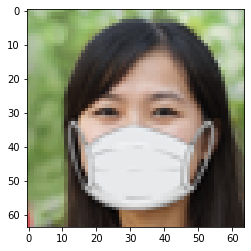

In [7]:
plt.imshow(X_test[0])

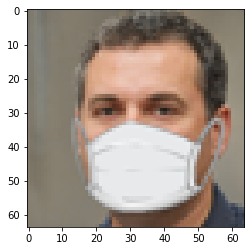

In [8]:
plt.imshow(X[20])

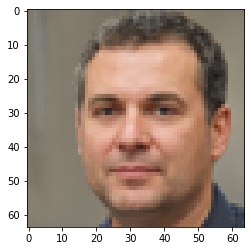

In [9]:
plt.imshow(y[20])

In [10]:
from icangetyoursmile.models import unet

In [11]:
model = unet(input_size=(64,64,3))

2022-03-02 00:28:07.532501: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-02 00:28:07.532540: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-02 00:28:07.532557: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (HP-CL): /proc/driver/nvidia/version does not exist
2022-03-02 00:28:07.533081: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
#model.summary()

In [15]:
results = model.fit(X, y, batch_size=8, epochs=800, use_multiprocessing=True)

Epoch 1/800
125/125 [==============================] - 7s 56ms/step - loss: 335.6350
Epoch 2/800
125/125 [==============================] - 8s 66ms/step - loss: 323.2521
Epoch 3/800
125/125 [==============================] - 8s 62ms/step - loss: 313.2796
Epoch 4/800
125/125 [==============================] - 7s 56ms/step - loss: 302.6462
Epoch 5/800
125/125 [==============================] - 7s 58ms/step - loss: 293.9774
Epoch 6/800
125/125 [==============================] - 7s 54ms/step - loss: 285.6873
Epoch 7/800
125/125 [==============================] - 7s 55ms/step - loss: 276.8169
Epoch 8/800
125/125 [==============================] - 7s 55ms/step - loss: 270.9851
Epoch 9/800
125/125 [==============================] - 7s 54ms/step - loss: 263.3975
Epoch 10/800
125/125 [==============================] - 7s 55ms/step - loss: 257.5336
Epoch 11/800
125/125 [==============================] - 7s 55ms/step - loss: 253.0302
Epoch 12/800
125/125 [==============================] - 7s 55ms

125/125 [==============================] - 6s 52ms/step - loss: 84.8989
Epoch 97/800
125/125 [==============================] - 7s 52ms/step - loss: 83.3897
Epoch 98/800
125/125 [==============================] - 6s 51ms/step - loss: 82.6841
Epoch 99/800
125/125 [==============================] - 6s 51ms/step - loss: 82.3040
Epoch 100/800
125/125 [==============================] - 6s 52ms/step - loss: 81.4915
Epoch 101/800
125/125 [==============================] - 6s 51ms/step - loss: 81.1998
Epoch 102/800
125/125 [==============================] - 6s 51ms/step - loss: 79.9122
Epoch 103/800
125/125 [==============================] - 6s 52ms/step - loss: 80.4076
Epoch 104/800
125/125 [==============================] - 6s 51ms/step - loss: 79.9188
Epoch 105/800
125/125 [==============================] - 6s 51ms/step - loss: 79.3792
Epoch 106/800
125/125 [==============================] - 6s 51ms/step - loss: 78.5005
Epoch 107/800
125/125 [==============================] - 6s 51ms/step -

125/125 [==============================] - 6s 50ms/step - loss: 53.2762
Epoch 192/800
125/125 [==============================] - 6s 50ms/step - loss: 53.9371
Epoch 193/800
125/125 [==============================] - 6s 50ms/step - loss: 53.3894
Epoch 194/800
125/125 [==============================] - 6s 51ms/step - loss: 53.3798
Epoch 195/800
125/125 [==============================] - 6s 51ms/step - loss: 52.8878
Epoch 196/800
125/125 [==============================] - 6s 51ms/step - loss: 53.0718
Epoch 197/800
125/125 [==============================] - 6s 50ms/step - loss: 53.1910
Epoch 198/800
125/125 [==============================] - 6s 51ms/step - loss: 52.7911
Epoch 199/800
125/125 [==============================] - 6s 51ms/step - loss: 52.2347
Epoch 200/800
125/125 [==============================] - 6s 52ms/step - loss: 52.0032
Epoch 201/800
125/125 [==============================] - 6s 51ms/step - loss: 52.1127
Epoch 202/800
125/125 [==============================] - 7s 53ms/ste

125/125 [==============================] - 6s 52ms/step - loss: 42.2502
Epoch 287/800
125/125 [==============================] - 7s 52ms/step - loss: 42.2846
Epoch 288/800
125/125 [==============================] - 6s 52ms/step - loss: 42.3457
Epoch 289/800
125/125 [==============================] - 6s 51ms/step - loss: 42.0290
Epoch 290/800
125/125 [==============================] - 6s 49ms/step - loss: 41.6179
Epoch 291/800
125/125 [==============================] - 6s 50ms/step - loss: 42.3363
Epoch 292/800
125/125 [==============================] - 6s 50ms/step - loss: 41.5481
Epoch 293/800
125/125 [==============================] - 6s 51ms/step - loss: 41.8376
Epoch 294/800
125/125 [==============================] - 6s 51ms/step - loss: 41.8047
Epoch 295/800
125/125 [==============================] - 6s 50ms/step - loss: 41.5861
Epoch 296/800
125/125 [==============================] - 6s 51ms/step - loss: 41.5602
Epoch 297/800
125/125 [==============================] - 6s 52ms/ste

125/125 [==============================] - 6s 51ms/step - loss: 35.9886
Epoch 382/800
125/125 [==============================] - 6s 51ms/step - loss: 35.8998
Epoch 383/800
125/125 [==============================] - 6s 51ms/step - loss: 36.3333
Epoch 384/800
125/125 [==============================] - 6s 51ms/step - loss: 36.1465
Epoch 385/800
125/125 [==============================] - 6s 51ms/step - loss: 35.8683
Epoch 386/800
125/125 [==============================] - 6s 51ms/step - loss: 35.5989
Epoch 387/800
125/125 [==============================] - 6s 51ms/step - loss: 35.5879
Epoch 388/800
125/125 [==============================] - 7s 52ms/step - loss: 36.0987
Epoch 389/800
125/125 [==============================] - 6s 51ms/step - loss: 35.9771
Epoch 390/800
125/125 [==============================] - 6s 51ms/step - loss: 35.4238
Epoch 391/800
125/125 [==============================] - 7s 52ms/step - loss: 35.6269
Epoch 392/800
125/125 [==============================] - 6s 50ms/ste

125/125 [==============================] - 6s 51ms/step - loss: 32.2690
Epoch 477/800
125/125 [==============================] - 6s 49ms/step - loss: 32.0325
Epoch 478/800
125/125 [==============================] - 6s 51ms/step - loss: 32.0954
Epoch 479/800
125/125 [==============================] - 6s 51ms/step - loss: 31.9067
Epoch 480/800
125/125 [==============================] - 6s 51ms/step - loss: 32.2298
Epoch 481/800
125/125 [==============================] - 6s 51ms/step - loss: 32.0612
Epoch 482/800
125/125 [==============================] - 6s 50ms/step - loss: 31.9863
Epoch 483/800
125/125 [==============================] - 6s 51ms/step - loss: 31.8389
Epoch 484/800
125/125 [==============================] - 6s 52ms/step - loss: 31.8768
Epoch 485/800
125/125 [==============================] - 7s 53ms/step - loss: 31.8490
Epoch 486/800
125/125 [==============================] - 6s 52ms/step - loss: 32.0420
Epoch 487/800
125/125 [==============================] - 7s 53ms/ste

125/125 [==============================] - 6s 51ms/step - loss: 29.4535
Epoch 572/800
125/125 [==============================] - 6s 52ms/step - loss: 29.2951
Epoch 573/800
125/125 [==============================] - 6s 52ms/step - loss: 29.3273
Epoch 574/800
125/125 [==============================] - 6s 51ms/step - loss: 29.2638
Epoch 575/800
125/125 [==============================] - 6s 52ms/step - loss: 29.4386
Epoch 576/800
125/125 [==============================] - 6s 49ms/step - loss: 29.5880
Epoch 577/800
125/125 [==============================] - 6s 52ms/step - loss: 29.3947
Epoch 578/800
125/125 [==============================] - 6s 51ms/step - loss: 29.0834
Epoch 579/800
125/125 [==============================] - 6s 50ms/step - loss: 29.8508
Epoch 580/800
125/125 [==============================] - 6s 51ms/step - loss: 29.1440
Epoch 581/800
125/125 [==============================] - 6s 50ms/step - loss: 29.3509
Epoch 582/800
125/125 [==============================] - 6s 49ms/ste

125/125 [==============================] - 6s 52ms/step - loss: 27.7047
Epoch 667/800
125/125 [==============================] - 6s 51ms/step - loss: 27.3919
Epoch 668/800
125/125 [==============================] - 6s 51ms/step - loss: 27.4147
Epoch 669/800
125/125 [==============================] - 6s 51ms/step - loss: 27.5395
Epoch 670/800
125/125 [==============================] - 6s 50ms/step - loss: 27.1991
Epoch 671/800
125/125 [==============================] - 6s 51ms/step - loss: 27.1237
Epoch 672/800
125/125 [==============================] - 6s 51ms/step - loss: 27.0403
Epoch 673/800
125/125 [==============================] - 6s 52ms/step - loss: 26.9570
Epoch 674/800
125/125 [==============================] - 6s 51ms/step - loss: 27.0269
Epoch 675/800
125/125 [==============================] - 6s 51ms/step - loss: 27.1815
Epoch 676/800
125/125 [==============================] - 6s 51ms/step - loss: 27.0502
Epoch 677/800
125/125 [==============================] - 6s 51ms/ste

125/125 [==============================] - 6s 51ms/step - loss: 25.4829
Epoch 762/800
125/125 [==============================] - 6s 51ms/step - loss: 25.5160
Epoch 763/800
125/125 [==============================] - 6s 51ms/step - loss: 25.4849
Epoch 764/800
125/125 [==============================] - 6s 51ms/step - loss: 25.3035
Epoch 765/800
125/125 [==============================] - 6s 52ms/step - loss: 25.4826
Epoch 766/800
125/125 [==============================] - 6s 51ms/step - loss: 25.3333
Epoch 767/800
125/125 [==============================] - 6s 51ms/step - loss: 25.6604
Epoch 768/800
125/125 [==============================] - 6s 50ms/step - loss: 25.5618
Epoch 769/800
125/125 [==============================] - 6s 51ms/step - loss: 25.4280
Epoch 770/800
125/125 [==============================] - 7s 52ms/step - loss: 25.3499
Epoch 771/800
125/125 [==============================] - 7s 52ms/step - loss: 25.2807
Epoch 772/800
125/125 [==============================] - 6s 52ms/ste

In [16]:
y_pred = model.predict(X_test).astype(np.uint8)

In [17]:
def plot_results(X_test, y_pred):
    plt.figure(figsize=(20,10))
    nb_graphs = len(X_test)
    for graph_nb in range(nb_graphs):
        plt.subplot(2,nb_graphs, graph_nb+1)
        plt.imshow(X_test[graph_nb])
        plt.subplot(2,nb_graphs, graph_nb +1 +nb_graphs)
        plt.imshow(y_pred[graph_nb])

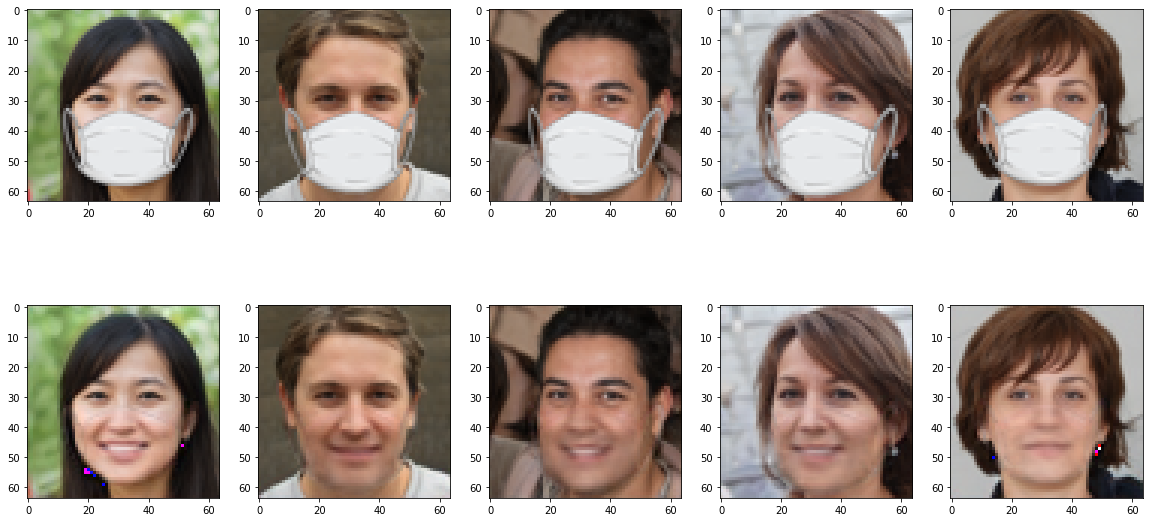

In [18]:
plot_results(X_test, y_pred)

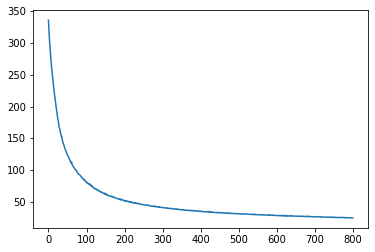

In [19]:
plt.plot(results.history['loss'])